In this notebook, I will explore how Nietzsche's work plays out in different embedding spaces. In particular, I will explore the following point:
- what word relationships exist in the Nietzsche corpus itself,
- where does Nietzsche stand among modern philosophers, and
- how does Nietzsche and other philosophers span out in the general corpus (here I use Google News word2vec)

In [2]:
import gensim
import lucem_illud
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.metrics.pairwise 
import sklearn.manifold 
from sklearn.decomposition import PCA

%matplotlib inline

import os
import os.path 

In [3]:
# loading Nietzsche corpus
#nietzsche_df = pd.read_csv('data/nietzsche_gutenberg.csv')
nietzsche_df = pd.read_csv('data/nietzsche_gutenberg_tokenized.csv')
nietzsche_df['normalized_tokens'] = nietzsche_df.normalized_tokens.apply(lambda x: [[w.strip("'") for w in x.strip('][').split(', ')]])
nietzsche_df.sample(5)

,text,book,year,after_1879,elisabeth_published,tokens,normalized_tokens
13766,They had rated the intellectuality of mankind ...,human2,1880,1,0,"[['They', 'had', 'rated', 'the', 'intellectual...","[[rate, intellectuality, mankind, highly, vow,..."
27117,Individual power is by no means surrendered th...,will3-4,1901,1,1,"[['Individual', 'power', 'is', 'by', 'no', 'me...","[[individual, power, mean, surrender]]"
14855,Let us be on our guard against saying that the...,joyful,1887,1,0,"[['Let', 'us', 'be', 'on', 'our', 'guard', 'ag...","[[let, guard, say, law, nature]]"
7580,"O Melancholy, be not wroth with me That I this...",eccehomo,1888,1,1,"[['O', 'Melancholy', 'be', 'not', 'wroth', 'wi...","[[o, melancholy, wroth'], ['pen, point, praise..."
24216,"They serve us as refuges, such as a wanderer m...",will1-2,1901,1,1,"[['They', 'serve', 'us', 'as', 'refuges', 'suc...","[[serve, refuge, wanderer, require, usebut, av..."


In [4]:
# tokenization
#nietzsche_df['tokens'] = nietzsche_df.text.apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
#nietzsche_df['normalized_tokens'] = nietzsche_df.tokens.apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [5]:
# store the file
#nietzsche_df.to_csv('data/nietzsche_gutenberg_tokenized.csv', index=False)

## A simple word2vec on Nietzsche's text alone

In [8]:
# Build w2v model on Nietzsche corpus
# nietzscheW2V = gensim.models.word2vec.Word2Vec(nietzsche_df.normalized_tokens.sum())
nietzscheW2V = gensim.models.Word2Vec.load('nietzsche_all_W2V')

In [44]:
# nietzscheW2V.save('nietzsche_all_W2V')

In [9]:
# Word Associations
nietzscheW2V.most_similar('power')

[('instinct', 0.9566537141799927),
 ('individual', 0.9420974254608154),
 ('strong', 0.9364473819732666),
 ('feel', 0.9306458830833435),
 ('mean', 0.917420506477356),
 ('preservation', 0.9162799119949341),
 ('degree', 0.9162737131118774),
 ('knowledge', 0.915080726146698),
 ('increase', 0.9114302396774292),
 ('kind', 0.9105126261711121)]

In [16]:
nietzscheW2V.most_similar('life')

[('existence', 0.9427402019500732),
 ('condition', 0.9388576745986938),
 ('possible', 0.9372498393058777),
 ('knowledge', 0.9364805221557617),
 ('mankind', 0.9335625171661377),
 ('human', 0.9285537004470825),
 ('attain', 0.9279490113258362),
 ('individual', 0.9258949756622314),
 ('aim', 0.9246214628219604),
 ('mean', 0.9241080284118652)]

In [10]:
nietzscheW2V.most_similar('woman')

[('child', 0.9584816098213196),
 ('want', 0.9522285461425781),
 ('one', 0.9496911764144897),
 ('hate', 0.9452183246612549),
 ('young', 0.9425678849220276),
 ('enemy', 0.9409613013267517),
 ('neighbour', 0.9399543404579163),
 ('wish', 0.9385924935340881),
 ('know', 0.9348160028457642),
 ('felicity', 0.9323712587356567)]

In [11]:
nietzscheW2V.most_similar('man')

[('strong', 0.8945948481559753),
 ('animal', 0.8940303325653076),
 ('believe', 0.891674280166626),
 ('suffer', 0.889530599117279),
 ('able', 0.8879750967025757),
 ('low', 0.884484052658081),
 ('possess', 0.8840685486793518),
 ('create', 0.8814001679420471),
 ('reason', 0.8801310658454895),
 ('precisely', 0.8798470497131348)]

In [17]:
nietzscheW2V.most_similar('female')

[('crowd', 0.9996416568756104),
 ('preacher', 0.9996140003204346),
 ('fond', 0.9996072053909302),
 ('gentleman', 0.9995946288108826),
 ('wood', 0.9995886087417603),
 ('bitterness', 0.9995601177215576),
 ('prophet', 0.9995403289794922),
 ('fold', 0.9995242953300476),
 ('crawl', 0.9995192289352417),
 ('recollection', 0.9995149374008179)]

In [18]:
nietzscheW2V.most_similar('male')

[('mistrust', 0.9993787407875061),
 ('enter', 0.9993674755096436),
 ('assure', 0.999331533908844),
 ('clumsy', 0.9993143677711487),
 ('enlightenment', 0.9993126392364502),
 ('simplicity', 0.9992983341217041),
 ('monstrous', 0.9992792010307312),
 ('seriousness', 0.9992613792419434),
 ('technical', 0.9992578029632568),
 ('emotional', 0.9992561340332031)]

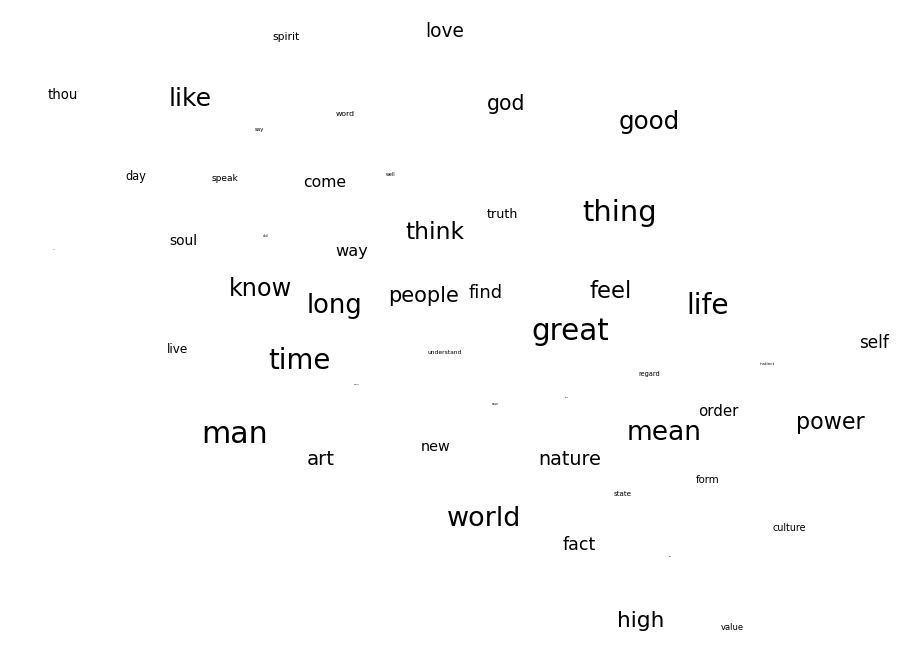

In [15]:
# Constructing t-SNE graphs of top words
numWords = 50
ntcTargetWords = nietzscheW2V.wv.index2word[:numWords]

ntcWordsSubMatrix = []
for word in ntcTargetWords:
    ntcWordsSubMatrix.append(nietzscheW2V[word])
ntcWordsSubMatrix = np.array(ntcWordsSubMatrix)

ntcPcaWords = sklearn.decomposition.PCA(n_components = 50).fit(ntcWordsSubMatrix)
ntc_reducedPCA_data = ntcPcaWords.transform(ntcWordsSubMatrix)
ntcTsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(ntc_reducedPCA_data)

# drawing the graph
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(ntcTsneWords[:, 0], ntcTsneWords[:, 1], alpha = 0)
for i, word in enumerate(ntcTargetWords):
    ax.annotate(word, (ntcTsneWords[:, 0][i],ntcTsneWords[:, 1][i]), size =  30 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

# Experimenting with time-series data

In [53]:
# borrowing code from week 7 homework
import copy

def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

In [51]:
rawEmbeddings, comparedEmbeddings = compareModels(nietzsche_df, 'year', text_column_name='normalized_tokens')

man


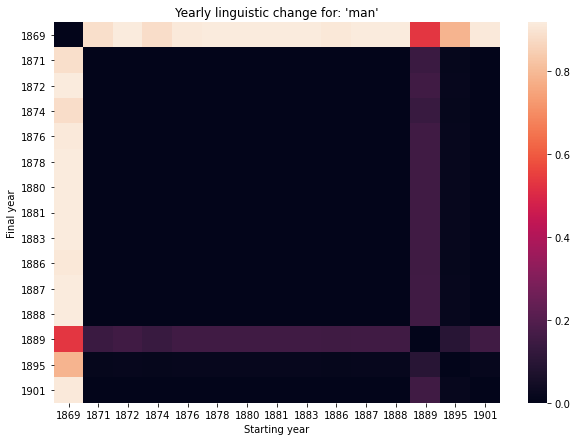

In [57]:
targetWord = 'man'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show() # No significant interpretable results

In [58]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)
    

In [59]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 47 words to compare


In [63]:
wordDivergences[:10] # Some interesting changes in Nietzsche's word usage

[('power', 14.11733284033835),
 ('cause', 14.00076114013791),
 ('new', 13.914798460900784),
 ('soul', 13.583424961194396),
 ('end', 13.457087557762861),
 ('eye', 12.942999560385942),
 ('good', 12.935695722699165),
 ('late', 12.805788420140743),
 ('place', 12.803910836577415),
 ('follow', 12.69264629483223)]

In [64]:
wordDivergences[-10:]

[('time', 10.468870773911476),
 ('different', 10.466917097568512),
 ('remain', 10.24921427667141),
 ('world', 10.216491967439651),
 ('think', 10.202924281358719),
 ('question', 9.718299329280853),
 ('deep', 9.579409085214138),
 ('lie', 9.377873793244362),
 ('work', 9.306382209062576),
 ('age', 8.620297729969025)]

# Studying Nietzsche in the context of modern philosophers

In [4]:
# Importing the dataset https://www.kaggle.com/kouroshalizadeh/history-of-philosophy

#modern_df = pd.read_csv('data/modern_phil.csv')
modern_df = pd.read_csv('data/modern_phil_tokenized.csv')
#modern_df['normalized_tokens'] = modern_df.tokenized_txt.apply(lambda x: [lucem_illud.normalizeTokens(x)])
#modern_df.to_csv('data/modern_phil_tokenized.csv')
modern_df['normalized_tokens'] = modern_df.normalized_tokens.apply(lambda x: [[w.strip("'") for w in x.strip('][').split(', ')]])
modern_df.head()

,Unnamed: 0,title,author,school,sentence_str,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,normalized_tokens
0,0,Second Treatise On Government,Locke,empiricism,"Reader, thou hast here the beginning and end o...",237,"reader, thou hast here the beginning and end o...","['reader', 'thou', 'hast', 'here', 'the', 'beg...","reader , thou hast here the beginning and end...","[[reader, thou, hast, begin, end, discourse, c..."
1,1,Second Treatise On Government,Locke,empiricism,"These, which remain, I hope are sufficient to ...",488,"these, which remain, i hope are sufficient to ...","['these', 'which', 'remain', 'hope', 'are', 's...","these , which remain , -PRON- hope be suffici...","[[remain, hope, sufficient, establish, throne,..."
2,2,Second Treatise On Government,Locke,empiricism,"If these papers have that evidence, I flatter ...",444,"if these papers have that evidence, i flatter ...","['if', 'these', 'papers', 'have', 'that', 'evi...","if these paper have that evidence , -PRON- fl...","[[paper, evidence, flat, find, great, miss, lo..."
3,3,Second Treatise On Government,Locke,empiricism,"The king, and body of the nation, have since s...",721,"the king, and body of the nation, have since s...","['the', 'king', 'and', 'body', 'of', 'the', 'n...","the king , and body of the nation , have sinc...","[[king, body, nation, thoroughly, confute, hyp..."
4,4,Second Treatise On Government,Locke,empiricism,If he think it not worth while to examine his ...,263,if he think it not worth while to examine his ...,"['if', 'he', 'think', 'it', 'not', 'worth', 'w...",if -PRON- think -PRON- not worth while to exa...,"[[think, worth, examine, work, thro, let, expe..."


In [47]:
modern_df.title.unique().shape

(47,)

In [5]:
phil_normalized_tokens = pd.concat([nietzsche_df.normalized_tokens, modern_df.normalized_tokens])

In [24]:
# Constructing W2V for modern philosophers
#modernW2V = gensim.models.word2vec.Word2Vec(phil_normalized_tokens.sum())
modernW2V = gensim.models.Word2Vec.load('modernW2V')

In [76]:
#modernW2V.save('modernW2V')

In [51]:
# Word associations
modernW2V.most_similar('power')

[('capacity', 0.6554887890815735),
 ('force', 0.6487203240394592),
 ('productive', 0.643592119216919),
 ('sovereign', 0.6271889805793762),
 ('capability', 0.6220934987068176),
 ('legislative', 0.607519268989563),
 ('executive', 0.5992879271507263),
 ('strength', 0.5977166891098022),
 ('efficacy', 0.5932028889656067),
 ('freedom', 0.586942732334137)]

In [26]:
modernW2V.most_similar('woman')

[('parent', 0.821353554725647),
 ('husband', 0.8081409931182861),
 ('young', 0.8055095672607422),
 ('female', 0.7957718968391418),
 ('wife', 0.7930506467819214),
 ('marry', 0.7833409309387207),
 ('mother', 0.7818793654441833),
 ('child', 0.7660934925079346),
 ('male', 0.7529222965240479),
 ('girl', 0.7487002611160278)]

In [27]:
modernW2V.most_similar('man')

[('creature', 0.6477414965629578),
 ('people', 0.5860347151756287),
 ('gift', 0.5673900246620178),
 ('fellow', 0.5640344023704529),
 ('woman', 0.5529381036758423),
 ('herd', 0.5524684190750122),
 ('mankind', 0.5333319902420044),
 ('mediocre', 0.5324283242225647),
 ('wise', 0.52173912525177),
 ('rarely', 0.5183969736099243)]

In [187]:
modernW2V.most_similar('life')

[('live', 0.6120035648345947),
 ('instinct', 0.6027302742004395),
 ('everyday', 0.5952799320220947),
 ('death', 0.5922095775604248),
 ('conveniencies', 0.5883718729019165),
 ('birth', 0.571550190448761),
 ('accomplishment', 0.5449061393737793),
 ('preservation', 0.5376116037368774),
 ('humanity', 0.5261181592941284),
 ('mankind', 0.5256490707397461)]

## Representing philosophers in 2D space

In [14]:
# Functions for centroid computation
def sentence_centroid(tokens, model):
    vocab = model.wv.vocab
    collec = np.array([model.wv[word] for word in tokens if word in vocab])
    if len(collec) < 1:
        return np.array([])
    else:
        return collec.mean(axis=0)

def author_centroid(token_list, model):
    collect = []
    for p in token_list:
        for s in p:
            sctr = sentence_centroid(s, model)
            if len(sctr) > 0:
                collect.append(sctr)
            
    return np.array(collect).mean(axis=0)

In [54]:
# Computing centroids
nietzsche_centroid = author_centroid(nietzsche_df.normalized_tokens, modernW2V)
authors = {'Nietzsche': nietzsche_centroid}

for author in modern_df.author.unique():
    ctr = author_centroid(modern_df[modern_df.author == author]['normalized_tokens'], modernW2V)
    authors[author] = ctr

In [145]:
#centroids_df = pd.DataFrame.from_dict(authors)
#centroids_df.to_csv('modern_phil_centroids.csv', index=False)
centroids_df = pd.read_csv('modern_phil_centroids.csv')

In [146]:
centroids_df

,Nietzsche,Locke,Hume,Berkeley,Spinoza,Leibniz,Descartes,Malebranche,Russell,Moore,...,Husserl,Heidegger,Kant,Fichte,Hegel,Marx,Lenin,Smith,Ricardo,Keynes
0,-0.057233,-0.035856,0.135278,0.002477,0.146141,0.178695,0.084429,0.048213,0.034171,0.085857,...,0.053067,-0.073974,0.131873,0.141297,0.039115,-0.107477,-0.052790,-0.018223,0.050650,0.154693
1,0.001976,0.238134,0.339350,0.286618,0.275007,0.245157,0.239952,0.205914,0.308522,0.452471,...,0.259487,0.177385,0.422005,0.357628,0.329084,-0.084561,0.159553,0.013023,0.045171,0.243154
2,-0.081024,0.116116,0.107546,0.170245,0.102492,-0.020788,0.096279,0.094581,-0.000540,-0.022048,...,-0.162725,-0.208678,0.000986,0.047838,-0.002985,0.155051,-0.009865,0.141184,0.157342,-0.034063
3,0.045985,0.261031,0.329102,0.199880,0.302768,0.097077,0.181323,0.182669,0.267450,0.316969,...,0.218256,0.159276,0.383916,0.343544,0.604888,0.332015,0.064504,0.332987,0.473129,0.238083
4,0.033499,-0.082246,-0.015816,-0.024990,-0.079020,-0.054308,-0.072225,-0.011775,0.041102,-0.028686,...,-0.045312,-0.049938,-0.035607,-0.024787,-0.088545,0.104897,0.102483,0.050743,0.047965,-0.022576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.242224,-0.408336,-0.286262,-0.338249,-0.300479,-0.194393,-0.308676,-0.238696,-0.309939,-0.388188,...,-0.368592,-0.351038,-0.470934,-0.419143,-0.493638,-0.612709,-0.267704,-0.599091,-1.014696,-0.660084
96,0.159160,0.239797,0.268892,0.260458,0.118440,0.191754,0.201568,0.269123,0.319498,0.235701,...,0.241985,0.147484,0.274022,0.245290,0.204158,0.230544,0.180670,0.277257,0.256874,0.289870
97,-0.706596,-0.968875,-1.034486,-1.045733,-1.152538,-0.791070,-0.967616,-0.993283,-0.947301,-0.961409,...,-0.865018,-0.773746,-1.052088,-0.960479,-0.969429,-0.721648,-0.482232,-0.853643,-0.979455,-0.728012
98,0.490704,0.562964,0.570567,0.642213,0.762485,0.485723,0.571312,0.615820,0.398633,0.454528,...,0.494369,0.460401,0.591039,0.525238,0.690382,0.496059,0.212081,0.562301,0.776241,0.431956


In [58]:
# Then we start mapping these centroids onto 2d space

pca = PCA(n_components=2)
reduced = pca.fit_transform(centroids_df.values.T)

In [60]:
# This section helps color the names of philosphers by their school
school_author = {}
school_color = {}
color = ['b', 'orange', 'm', 'c', 'y', 'g', 'r', 'gray', 'k']

for school in modern_df.school.unique():
    authors = modern_df[modern_df.school == school]['author'].unique()
    school_author[school] = authors

school_author['nihilism'] = ['Nietzsche']
school_list = list(school_author.keys())
    
for i in range(len(school_list)):
    school_color[school_list[i]] = color[i]

def author_color(author):
    school = ''
    color = 'black'
    for k, v in school_author.items():
        if author in v:
            school = k
            color = school_color[school]
    return color

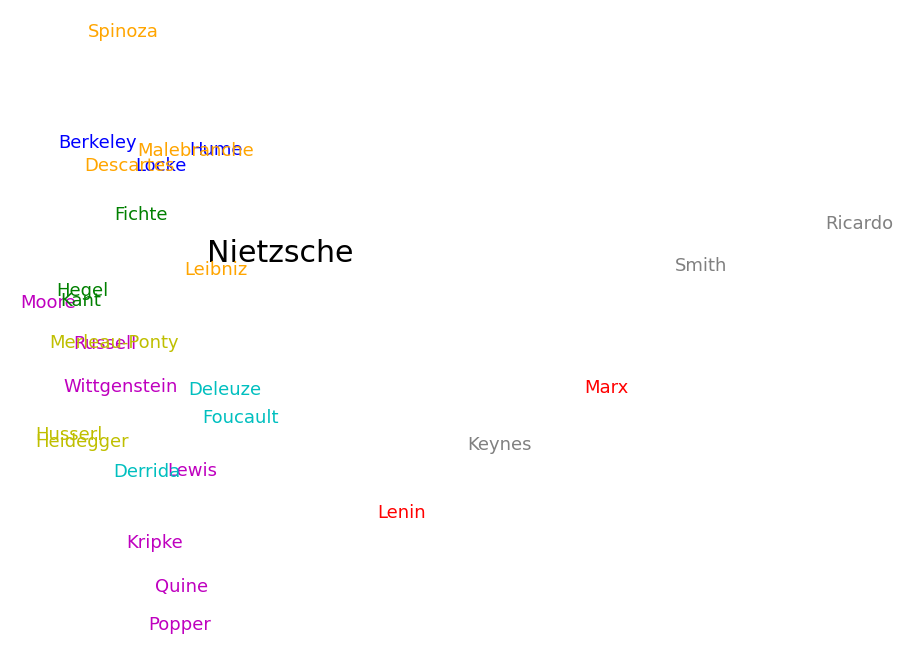

In [62]:
# plotting all philosophers onto 2d space
authors = centroids_df.columns.to_numpy()
numAuthors = len(authors)

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(t[:, 0], t[:, 1], alpha = 0)
for i, word in enumerate(authors):
    color = author_color(word)
    if word == 'Nietzsche':
        size = 30
    else:
        size=18
    ax.annotate(word, (t[:, 0][i],t[:, 1][i]), size=size, horizontalalignment='center', color=color)
plt.xticks(())
plt.yticks(())
#plt.title('TSNE for Word Embedding Centroids of Each Author', size=30)
plt.show()

# Cheking the semantic space of Doc2Vec

In [6]:
nietzsche_df['author'] = ['Nietzsche']*nietzsche_df.shape[0]

In [7]:
# compiling the Nietzsche corpus and the modern philosophy corpus for easier use later
phil_all_df = modern_df[['author', 'normalized_tokens']].append(nietzsche_df[['author', 'normalized_tokens']],
                                                               ignore_index=True)

phil_all_df.sample(10)

,author,normalized_tokens
138921,Merleau-Ponty,"[[objective, world, plenum, time]]"
146339,Heidegger,"[[hand, dasein, define, ontologically, life, o..."
79595,Popper,"[[empirical, method, shall, characterize, meth..."
36942,Malebranche,"[[reason, evil, life, affect, soul, good]]"
71942,Quine,"[[abstract, lgehra, proceed, readily, relation..."
189984,Hegel,"[[stay, appearance, mere, representation, ordi..."
251574,Nietzsche,"[[love, man, votary, life]]"
80864,Popper,"[[basic, statement, test, statement, like, lan..."
89180,Kripke,"[[numb, planet, necessarily, odd, mean, thing,..."
250700,Nietzsche,"[[remain, degree, unscientific, science, matt]]"


In [72]:
# Tagging each sentence by athor name
taggedDocs = []
for index, row in phil_all_df.iterrows():
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'][0], tags = row['author']))
phil_all_df['Tagged'] = taggedDocs

In [8]:
# Train D2V model

#philD2V = gensim.models.doc2vec.Doc2Vec(phil_all_df['Tagged'], size = 100)
#philD2V.save('philD2V')
philD2V = gensim.models.Doc2Vec.load('philD2V')

In [77]:
# Word Associations
philD2V.most_similar('man')

[('people', 0.8057079315185547),
 ('woman', 0.740618884563446),
 ('hisdominions', 0.7344627976417542),
 ('endear', 0.6883183717727661),
 ('lot', 0.6856588125228882),
 ('fellow', 0.6834760308265686),
 ('reverenced', 0.6811655163764954),
 ('demiurge', 0.6654059290885925),
 ('endogamous', 0.6645074486732483),
 ('citizen', 0.6638640761375427)]

In [183]:
philD2V.most_similar('woman')

[('husband', 0.9263443946838379),
 ('wife', 0.9253075122833252),
 ('parent', 0.9105281829833984),
 ('young', 0.8958017826080322),
 ('marry', 0.8950382471084595),
 ('servant', 0.8931472301483154),
 ('child', 0.8898907899856567),
 ('mother', 0.887130618095398),
 ('girl', 0.877029538154602),
 ('fellow', 0.8622715473175049)]

In [9]:
philD2V.most_similar('power')

[('freedom', 0.7206445932388306),
 ('capacity', 0.7059760689735413),
 ('executive', 0.7051065564155579),
 ('inability', 0.6783374547958374),
 ('legislative', 0.6742599606513977),
 ('intelligence', 0.6726275086402893),
 ('activity', 0.6708846092224121),
 ('spiritualisation', 0.665083110332489),
 ('intellect', 0.6625948548316956),
 ('competition', 0.6608235239982605)]

In [185]:
philD2V.most_similar('life')

[('felicity', 0.6714372038841248),
 ('struggle', 0.6712887287139893),
 ('civilization', 0.6643083095550537),
 ('averse', 0.6617900729179382),
 ('conveniencies', 0.6594306230545044),
 ('mankind', 0.6587602496147156),
 ('transitoriness', 0.6555150151252747),
 ('destiny', 0.6429023742675781),
 ('death', 0.6417343020439148),
 ('strive', 0.6340427994728088)]

## Plotting the philosophers in the semantic space of D2V

In [15]:
# Computing centroids
authors_d2v = {}
for author in authors:
    ctr = author_centroid(phil_all_df[phil_all_df.author == author]['normalized_tokens'], philD2V)
    authors_d2v[author] = ctr

In [16]:
# Reducing dimensions
centroids_d2v_df = pd.DataFrame.from_dict(authors_d2v)

pca_d2v = PCA(n_components=2).fit(centroids_d2v_df.values.T)
reduced_d2v = pca_d2v.transform(centroids_d2v_df.values.T)

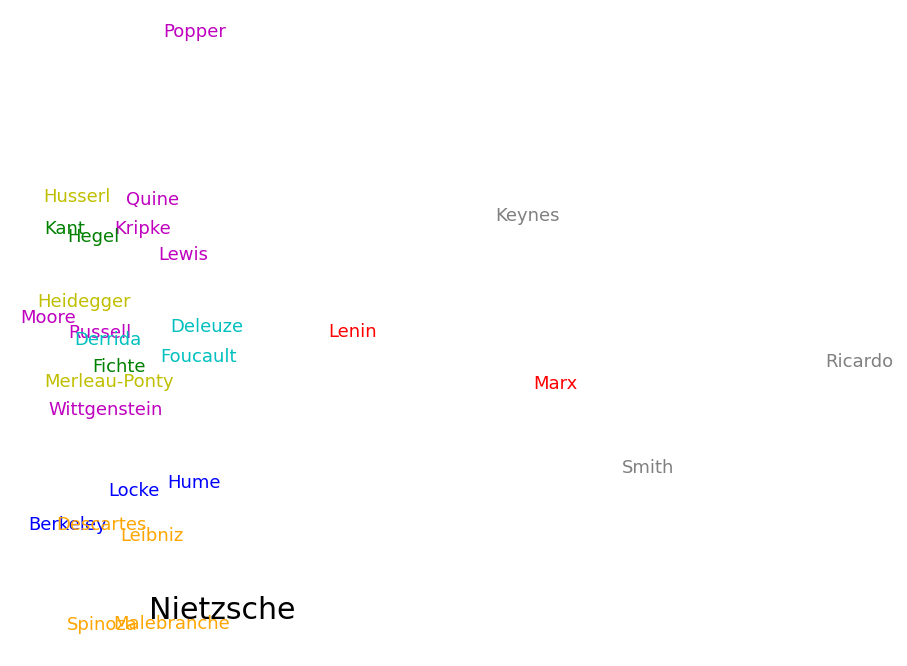

In [179]:
# Plot
authors = centroids_d2v_df.columns.to_numpy()
numAuthors = len(authors)

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_d2v[:, 0], reduced_d2v[:, 1], alpha = 0)
for i, word in enumerate(authors):
    color = author_color(word)
    if word == 'Nietzsche':
        size = 30
    else:
        size=18
    ax.annotate(word, (reduced_d2v[:, 0][i],reduced_d2v[:, 1][i]), size=size, horizontalalignment='center', color=color)
plt.xticks(())
plt.yticks(())
#plt.title('TSNE for Word Embedding Centroids of Each Author', size=30)
plt.show()

# Heatmaps - for studying pair differences

In [42]:
heatmapMatrix = []
authors = phil_all_df.author.unique()

for tagOuter in authors:
    column = []
    tagVec = centroids_d2v_df[tagOuter].to_numpy().reshape(1,-1)
    for tagInner in authors:
        cos = sklearn.metrics.pairwise.cosine_similarity(tagVec, centroids_d2v_df[tagInner].to_numpy().reshape(1,-1))
        column.append(cos)
    heatmapMatrix.append(column)

heatmapMatrix = np.array(heatmapMatrix)

In [43]:
heatmapMatrix = heatmapMatrix.reshape(29,29)

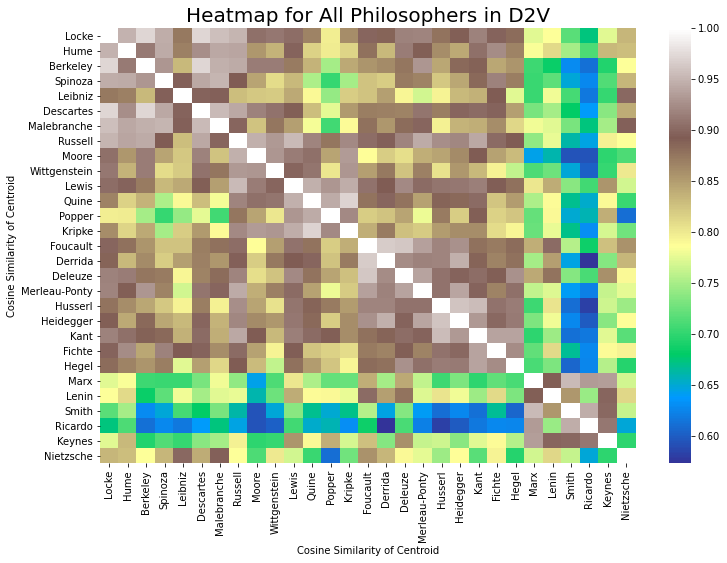

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(heatmapMatrix, xticklabels=authors, yticklabels=authors, ax=ax, cmap='terrain')
plt.title("Heatmap for All Philosophers in D2V", size=20)
plt.xlabel('Cosine Similarity of Centroid')
plt.ylabel('Cosine Similarity of Centroid');
# This is too messy, need a smaller set of philosophers

In [30]:
# Collect German philosophers from the corpus
german_phil = ['Leibniz','Fichte','Hegel','Marx','Nietzsche',  'Husserl', 'Heidegger']

In [31]:
heatmapMatrix = []

for tagOuter in german_phil:
    column = []
    tagVec = centroids_d2v_df[tagOuter].to_numpy().reshape(1,-1)
    for tagInner in german_phil:
        cos = sklearn.metrics.pairwise.cosine_similarity(tagVec, centroids_d2v_df[tagInner].to_numpy().reshape(1,-1))
        column.append(cos)
    heatmapMatrix.append(column)

heatmapMatrix = np.array(heatmapMatrix)

In [32]:
heatmapMatrix = heatmapMatrix.reshape(7,7)

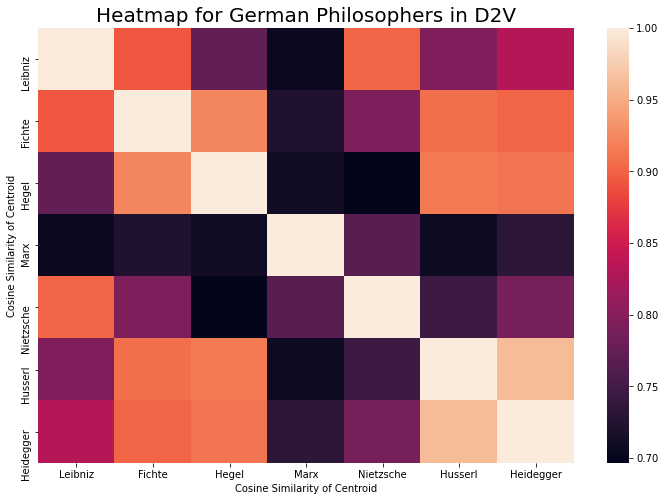

In [40]:
# Plotting heatmap comparing the likeness of German philosophers
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(heatmapMatrix, xticklabels=german_phil, yticklabels=german_phil, ax=ax)
plt.title("Heatmap for German Philosophers in D2V", size=20)
plt.xlabel('Cosine Similarity of Centroid')
plt.ylabel('Cosine Similarity of Centroid');

# Projection on Google News Embeddings

In [133]:
# Reference: https://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/ 
# File download: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

# Load Google's pre-trained Word2Vec model.
ggmodel = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True, encoding='latin-1')

In [137]:
# word associations
ggmodel.most_similar('power')

[('Power', 0.5925928354263306),
 ('electricity', 0.5807569026947021),
 ('Conscientiously_wield', 0.5534924268722534),
 ('electicity', 0.5028905868530273),
 ('power.The', 0.5000944137573242),
 ('ChemGenex_harnesses', 0.4956178069114685),
 ('Inguri_hydroelectric', 0.4920346140861511),
 ('energy', 0.48809513449668884),
 ('electricy', 0.48531195521354675),
 ('NTSB_Airliner_engines', 0.48415496945381165)]

In [182]:
ggmodel.most_similar('life')

[('lives', 0.6027060747146606),
 ('chiseled_burnished_refined', 0.5310098528862),
 ('Interaction_enriches_your', 0.4961995780467987),
 ('Shanda_Interaction_enriches', 0.49457845091819763),
 ('Life', 0.4814741611480713),
 ('Fayaz_Wani_reports', 0.4636700749397278),
 ('lifestyle', 0.44911327958106995),
 ('joys_sorrows', 0.44626230001449585),
 ('humdrum_existence', 0.44414761662483215),
 ('earthly_existence', 0.4437880218029022)]

In [138]:
ggmodel.most_similar('man')

[('woman', 0.7664012312889099),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930751800537),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196004867554),
 ('men', 0.5489763021469116)]

In [139]:
ggmodel.most_similar('woman')

[('man', 0.7664012312889099),
 ('girl', 0.7494640946388245),
 ('teenage_girl', 0.7336829900741577),
 ('teenager', 0.631708562374115),
 ('lady', 0.6288785934448242),
 ('teenaged_girl', 0.6141784191131592),
 ('mother', 0.607630729675293),
 ('policewoman', 0.6069462299346924),
 ('boy', 0.5975908041000366),
 ('Woman', 0.5770983099937439)]

## Projection

In [140]:
# Centroid computation
authors_gg = {}
for author in authors:
    ctr = author_centroid(phil_all_df[phil_all_df.author == author]['normalized_tokens'], ggmodel)
    authors_gg[author] = ctr

In [180]:
# Projecting to 2D space
centroids_gg_df = pd.DataFrame.from_dict(authors_gg)

pca_gg = PCA(n_components=2)
reduced_gg = pca.fit_transform(centroids_gg_df.values.T)

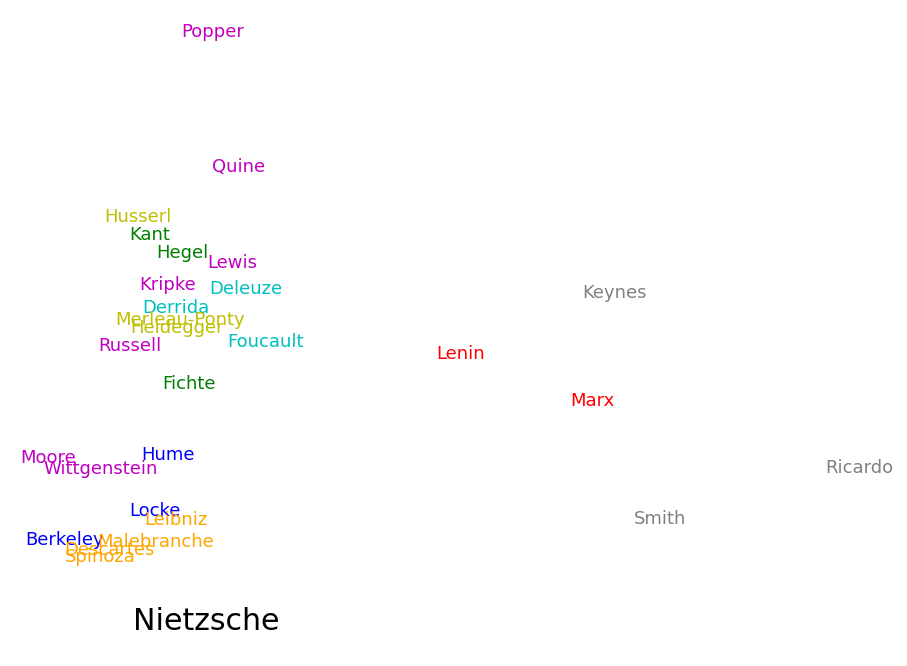

In [181]:
# Plot
authors = centroids_gg_df.columns.to_numpy()
numAuthors = len(authors)

fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_gg[:, 0], reduced_gg[:, 1], alpha = 0)
for i, word in enumerate(authors):
    color = author_color(word)
    if word == 'Nietzsche':
        size = 30
    else:
        size=18
    ax.annotate(word, (reduced_gg[:, 0][i],reduced_gg[:, 1][i]), size=size, horizontalalignment='center', color=color)
plt.xticks(())
plt.yticks(())
#plt.title('TSNE for Word Embedding Centroids of Each Author', size=30)
plt.show()

# A comparison of early and late Nietzsche

In [188]:
# Two distinct W2V that take (1) Nietzsche's work before 1879 and (2) after.
#earlyW2V = gensim.models.word2vec.Word2Vec(nietzsche_df[nietzsche_df.after_1879==False]['normalized_tokens'].sum())
#lateW2V = gensim.models.word2vec.Word2Vec(nietzsche_df[nietzsche_df.after_1879==True]['normalized_tokens'].sum())
earlyW2V = gensim.models.Word2Vec.load('early_nietzsche_w2v')
lateW2V = gensim.models.Word2Vec.load('late_nietzsche_w2v')

In [189]:
#earlyW2V.save('early_nietzsche_w2v')
#lateW2V.save('late_nietzsche_w2v')

In [190]:
# Word Associations
earlyW2V.most_similar('power')

[('lie', 0.9999335408210754),
 ('appear', 0.9999294877052307),
 ('remain', 0.9999268651008606),
 ('mean', 0.9999247789382935),
 ('freedom', 0.9999239444732666),
 ('apollonian', 0.9999235272407532),
 ('period', 0.9999231100082397),
 ('certain', 0.9999209642410278),
 ('attain', 0.9999197125434875),
 ('accord', 0.9999196529388428)]

In [194]:
earlyW2V.most_similar('life')

[('gift', 0.999910295009613),
 ('turn', 0.999907910823822),
 ('tell', 0.9999068975448608),
 ('picture', 0.9999005794525146),
 ('impulse', 0.99989914894104),
 ('element', 0.9998987913131714),
 ('able', 0.9998975992202759),
 ('require', 0.9998973608016968),
 ('necessary', 0.999896764755249),
 ('live', 0.9998962879180908)]

In [193]:
earlyW2V.most_similar('man')

[('turn', 0.9999016523361206),
 ('rule', 0.9998881220817566),
 ('look', 0.9998881220817566),
 ('socrates', 0.9998868703842163),
 ('influence', 0.9998830556869507),
 ('myth', 0.999879002571106),
 ('small', 0.9998787045478821),
 ('picture', 0.9998780488967896),
 ('force', 0.9998769760131836),
 ('appear', 0.9998769760131836)]

In [192]:
earlyW2V.most_similar('woman')

[('hand', 0.9999219179153442),
 ('wisdom', 0.9999209642410278),
 ('turn', 0.9999208450317383),
 ('consider', 0.9999204874038696),
 ('rise', 0.9999196529388428),
 ('noble', 0.9999195337295532),
 ('schopenhauer', 0.9999189376831055),
 ('require', 0.999918520450592),
 ('seek', 0.9999181628227234),
 ('bear', 0.9999178647994995)]

In [191]:
lateW2V.most_similar('power')

[('feel', 0.9934930801391602),
 ('strong', 0.9883769750595093),
 ('individual', 0.9877122640609741),
 ('instinct', 0.986525297164917),
 ('increase', 0.9864629507064819),
 ('self', 0.986402153968811),
 ('great', 0.9863210916519165),
 ('mean', 0.9858720302581787),
 ('kind', 0.9851889610290527),
 ('life', 0.9841554164886475)]

In [195]:
lateW2V.most_similar('life')

[('individual', 0.9943383932113647),
 ('mean', 0.9942817687988281),
 ('condition', 0.9935892224311829),
 ('form', 0.9934338927268982),
 ('fundamental', 0.9930564761161804),
 ('end', 0.9926079511642456),
 ('degree', 0.9925733208656311),
 ('kind', 0.9923549890518188),
 ('general', 0.9923189878463745),
 ('increase', 0.9922922849655151)]

In [196]:
lateW2V.most_similar('man')

[('nature', 0.9892473816871643),
 ('thing', 0.9883625507354736),
 ('conscience', 0.9881168007850647),
 ('regard', 0.9875966310501099),
 ('human', 0.9873403906822205),
 ('call', 0.9869978427886963),
 ('natured', 0.9866329431533813),
 ('hold', 0.9861787557601929),
 ('bad', 0.986143946647644),
 ('taste', 0.9858584403991699)]

In [197]:
lateW2V.most_similar('woman')

[('child', 0.997894287109375),
 ('want', 0.9973326921463013),
 ('one', 0.9972632527351379),
 ('learn', 0.9965379238128662),
 ('well', 0.9965269565582275),
 ('loveth', 0.9963738918304443),
 ('neighbour', 0.9960241317749023),
 ('young', 0.9959086179733276),
 ('hath', 0.9958542585372925),
 ('enemy', 0.9958357810974121)]